# TASK 7: Basic Sales Summary from SQLite using Python

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [7]:
# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER,
    price REAL
)
""")

In [9]:
# Insert sample data if table is empty
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Apple', 10, 2.5),
        ('Banana', 15, 1.2),
        ('Orange', 8, 3.0),
        ('Apple', 5, 2.5),
        ('Banana', 10, 1.2),
        ('Orange', 12, 3.0)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [11]:
# SQL query for sales summary
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [13]:
# Print summary
print("Sales Summary:\n")
print(df)

Sales Summary:

  product  total_qty  revenue
0   Apple         15     37.5
1  Banana         25     30.0
2  Orange         20     60.0


<Figure size 800x500 with 0 Axes>

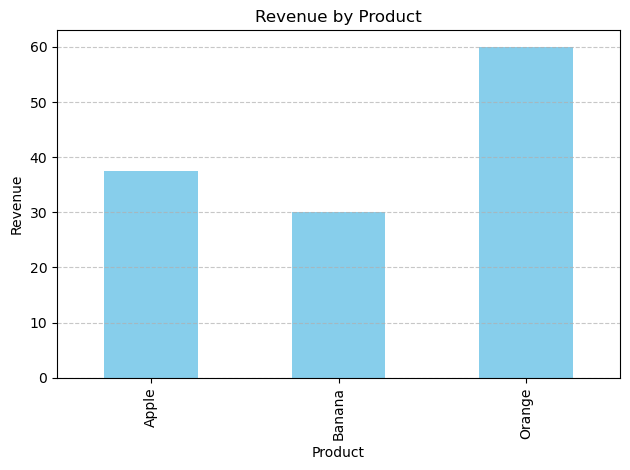

In [15]:
# Plot revenue by product
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [17]:
# Close the connection
conn.close()